In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
oc_types = ["ORCHID-100X-OSCC-MD", "ORCHID-100X-OSCC-PD", "ORCHID-100X-OSCC-WD", "ORCHID-100X-OSMF"]
cell_types = ["Neoplastic","Inflammatory","Connective","Dead","Epithelial","UNK"]

parent_folder = "/media/chs.gpu/chs-rintu/ORCHID-100X-OUTPUT"

cell_stats_paths = [os.path.join(parent_folder, type_, "cell_stats_combined.csv") for type_ in oc_types]

In [3]:
cell_stats_paths

['/media/chs.gpu/chs-rintu/ORCHID-100X-OUTPUT/ORCHID-100X-OSCC-MD/cell_stats_combined.csv',
 '/media/chs.gpu/chs-rintu/ORCHID-100X-OUTPUT/ORCHID-100X-OSCC-PD/cell_stats_combined.csv',
 '/media/chs.gpu/chs-rintu/ORCHID-100X-OUTPUT/ORCHID-100X-OSCC-WD/cell_stats_combined.csv',
 '/media/chs.gpu/chs-rintu/ORCHID-100X-OUTPUT/ORCHID-100X-OSMF/cell_stats_combined.csv']

In [18]:
def generate_cell_type_count(df, cell_types):
    # cell_count_gb = {}
    # for i, patient_id in enumerate(df.loc[:, "Paitent-ID"]):  
    #     cell_count = {}
    #     for cell_type in cell_types:
    #         if cell_type not in cell_count.keys():
    #             cell_count[cell_type] = 0
    #         cell_count[cell_type] += df.loc[i, cell_type]

    #     if patient_id not in cell_count_gb.keys():
    #         cell_count_gb[patient_id] = {}
    #     for cell_type in cell_count.keys():
    #         if cell_type not in cell_count_gb[patient_id].keys():
    #             cell_count_gb[patient_id][cell_type] = 0
    #         cell_count_gb[patient_id][cell_type] += cell_count[cell_type]
    # return cell_count_gb
    result = df.groupby('Paitent-ID').agg({
        'Neoplastic': 'sum',
        'Inflammatory': 'sum',
        'Connective': 'sum',
        'Dead': 'sum',
        'Epithelial': 'sum',
        'UNK': 'sum'
    }).to_dict(orient='index')
    return result


def generate_graph(cell_count: dict):
    '''
    input: cell_count of a patient
         : dict where keys are cell types
    '''
    COLOR_MAP_JAMA = [
        (55,78,85),(223,143,68),(0,161,213),(178,71,69),(121,175,151),(0, 0, 0)
    ]
    
    total_cell_count = sum(cell_count.values())
    
    for key in cell_count.keys():
        cell_count[key] /= total_cell_count
    print(int(sum(cell_count.values())) == 1)
    # Create a bar plot
    bars = plt.barh(list(cell_count.keys()), list(cell_count.values()), color=[(r / 255, g / 255, b / 255) for r, g, b in COLOR_MAP_JAMA])

    # Add labels and title
    plt.xlabel('Percentage')
    plt.ylabel('Cell Types')
    plt.title('Bar Plot of Cell Type Percentages')

    # Add text annotations on the bars
    # for bar in bars:
    #     plt.text(bar.get_x() + bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width():.0%}', ha='left', va='center')

    plt.tight_layout()
    return plt


True
/media/chs.gpu/chs-rintu/ORCHID-100X-OUTPUT/ORCHID-100X-OSCC-MD/cell_type_bp/10-10.png
False
/media/chs.gpu/chs-rintu/ORCHID-100X-OUTPUT/ORCHID-100X-OSCC-MD/cell_type_bp/10-11.png
True
/media/chs.gpu/chs-rintu/ORCHID-100X-OUTPUT/ORCHID-100X-OSCC-MD/cell_type_bp/10-12.png
True
/media/chs.gpu/chs-rintu/ORCHID-100X-OUTPUT/ORCHID-100X-OSCC-MD/cell_type_bp/10-13.png
True
/media/chs.gpu/chs-rintu/ORCHID-100X-OUTPUT/ORCHID-100X-OSCC-MD/cell_type_bp/10-5.png
True
/media/chs.gpu/chs-rintu/ORCHID-100X-OUTPUT/ORCHID-100X-OSCC-MD/cell_type_bp/10-6.png
True
/media/chs.gpu/chs-rintu/ORCHID-100X-OUTPUT/ORCHID-100X-OSCC-MD/cell_type_bp/10-7.png
True
/media/chs.gpu/chs-rintu/ORCHID-100X-OUTPUT/ORCHID-100X-OSCC-MD/cell_type_bp/10-8.png
True
/media/chs.gpu/chs-rintu/ORCHID-100X-OUTPUT/ORCHID-100X-OSCC-MD/cell_type_bp/10-9.png
False
/media/chs.gpu/chs-rintu/ORCHID-100X-OUTPUT/ORCHID-100X-OSCC-MD/cell_type_bp/16-11.png
True
/media/chs.gpu/chs-rintu/ORCHID-100X-OUTPUT/ORCHID-100X-OSCC-MD/cell_type_bp/1

KeyboardInterrupt: 

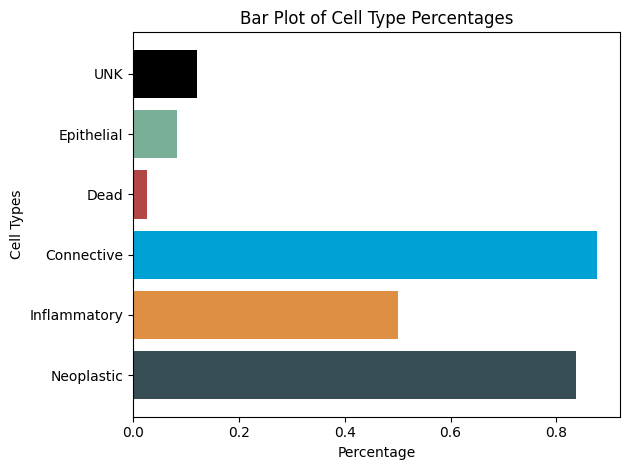

In [19]:
for cell_stats_path in cell_stats_paths:
    oc_df = pd.read_csv(cell_stats_path)
    cell_counts = generate_cell_type_count(oc_df, cell_types)
    os.makedirs(os.path.join(os.path.dirname(cell_stats_path), "cell_type_bp"), exist_ok=True)
    for patient_id in cell_counts.keys():
        plot = generate_graph(cell_counts[patient_id])
        plot.savefig(os.path.join(os.path.dirname(cell_stats_path), "cell_type_bp", f"{patient_id}.png"))
        print(os.path.join(os.path.dirname(cell_stats_path), "cell_type_bp", f"{patient_id}.png"))
    

In [37]:
cell_counts

In [36]:
generate_graph(cell_counts["7-10"])

TypeError: 'NoneType' object is not subscriptable